In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
N = 5  # Maximum number of possible peak
Data_size = 300000  

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready

print(Parameters.shape[1])

5


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] ** 2 / ((x - a[i])**2 + b[i]**2)
    return result 
    # noise = -0.2 ~ 0.2 

In [0]:
# X domain fixed
x = np.arange(-2, 2, 0.01)
print(len(x))

400


In [0]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        Parameters[i][j] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
    
# Check out
print(Parameters)

[[[0.86785796 0.12916615]
  [0.81638234 0.14090385]
  [0.14747346 0.1901859 ]
  [0.00346552 0.1444309 ]
  [0.38310074 0.16813776]]

 [[0.5571543  0.18616437]
  [0.95434158 0.19092927]
  [0.87162917 0.11377687]
  [0.63400254 0.13595334]
  [0.01253777 0.14240327]]

 [[0.06838439 0.14089819]
  [0.7357113  0.172836  ]
  [0.45004275 0.12953186]
  [0.80314653 0.14058099]
  [0.8082132  0.17035118]]

 ...

 [[0.36259829 0.15482539]
  [0.95998678 0.19624872]
  [0.00810966 0.13603089]
  [0.07925653 0.12898727]
  [0.2877186  0.15504198]]

 [[0.368561   0.14973835]
  [0.65830645 0.11278546]
  [0.15750703 0.11377435]
  [0.1323926  0.1340571 ]
  [0.32873644 0.15322832]]

 [[0.13230974 0.11004433]
  [0.38855508 0.12859448]
  [0.97647636 0.14291818]
  [0.46927556 0.14115888]
  [0.2094799  0.13511834]]]


In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(3, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:4])), peak]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak]))



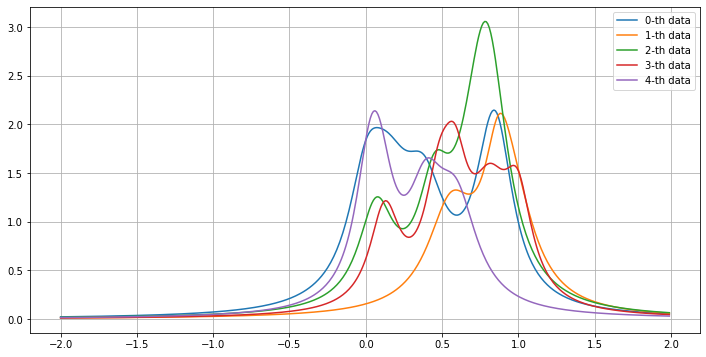

In [0]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')
    

In [0]:
for i in range(20):
    print(sum(Data_x[i]), len(list(filter(lambda x:x > 0, Data_y[i]))) /2)

229.71743947653977 1.0
144.17148128579575 1.0
223.92894083255158 1.0
183.19267480018365 1.0
166.76706844234047 1.0
178.77640032463714 1.0
221.88864830178812 1.0
200.04490269733682 1.0
198.0077185816888 1.0
188.1055362779038 1.0
160.62275674359526 1.0
105.7774252369133 1.0
216.62184329208344 1.0
197.70856895480878 1.0
127.99841225960547 1.0
216.60337947878818 1.0
122.36265962444095 1.0
164.6335652204746 1.0
205.92300389598688 1.0
215.65560854374874 1.0


In [0]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:150000])
val_data = np.array(Data_x[150000:250000])
test_data = np.array(Data_x[250000:])

train_labels = np.array(Data_y[:150000])
val_labels = np.array(Data_y[150000:250000])
test_labels = np.array(Data_y[250000:])

In [0]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 400) (150000, 2)
(100000, 400) (100000, 2)
(50000, 400) (50000, 2)


In [0]:
# reshape for Image-form setting
train_data = train_data.reshape(150000, 20, 20, 1)
val_data = val_data.reshape(100000, 20, 20, 1)
test_data = test_data.reshape(50000, 20, 20, 1)


In [0]:
# From Here on, let`s start to make Convolution Neural Network!

# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

model2.add(Conv2D(8, (2, 2), activation='relu', input_shape=(20, 20, 1), 
                  kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())

model2.add(Conv2D(8, (2, 2), activation='relu',
                  kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())

# Fully-Connected Layers
model2.add(Flatten())
model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(2))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 8)           264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               25800     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2

In [0]:
# Training Method setting for Regression
model2.compile(loss='mse', metrics=[
               'mae'], optimizer=Adam())

In [0]:
# Training Start!
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=50, 
                   batch_size=1000,
                   validation_data=(val_data, val_labels), verbose=2)

Epoch 1/50
150/150 - 1s - loss: 4193.1797 - mae: 31.6937 - val_loss: 157.2566 - val_mae: 7.3144
Epoch 2/50
150/150 - 1s - loss: 127.7909 - mae: 6.5912 - val_loss: 100.1886 - val_mae: 5.8607
Epoch 3/50
150/150 - 1s - loss: 78.3337 - mae: 5.1623 - val_loss: 59.1728 - val_mae: 4.4912
Epoch 4/50
150/150 - 1s - loss: 46.1625 - mae: 3.9385 - val_loss: 35.5024 - val_mae: 3.4442
Epoch 5/50
150/150 - 1s - loss: 28.0844 - mae: 3.0558 - val_loss: 21.6062 - val_mae: 2.6895
Epoch 6/50
150/150 - 1s - loss: 16.7393 - mae: 2.3687 - val_loss: 12.6633 - val_mae: 2.0729
Epoch 7/50
150/150 - 1s - loss: 10.0146 - mae: 1.8528 - val_loss: 7.8596 - val_mae: 1.6614
Epoch 8/50
150/150 - 1s - loss: 6.5503 - mae: 1.5336 - val_loss: 5.4547 - val_mae: 1.4158
Epoch 9/50
150/150 - 1s - loss: 4.8521 - mae: 1.3460 - val_loss: 4.3154 - val_mae: 1.2762
Epoch 10/50
150/150 - 1s - loss: 4.0108 - mae: 1.2335 - val_loss: 3.6932 - val_mae: 1.1847
Epoch 11/50
150/150 - 1s - loss: 3.5186 - mae: 1.1589 - val_loss: 3.3508 - val_m

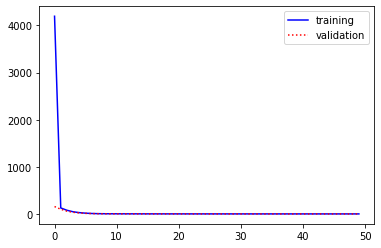

In [0]:
# Plotting loss graph
plt.plot(hist2.history['loss'], 'b-', label="training")
plt.plot(hist2.history['val_loss'], 'r:', label="validation")
plt.legend()
plt.show()

In [0]:
# Prediction

predict = model2.predict(test_data)
print(predict)

[[179.40558     4.0998597]
 [188.34822     4.0448556]
 [183.28783     3.8945563]
 ...
 [225.91695     4.6678557]
 [154.96165     3.5713704]
 [197.79083     4.352788 ]]


In [0]:
predict[2].shape

(2,)

In [0]:
test_data = test_data.reshape((50000, 400))

In [0]:
plt.figure(figsize=(12, 8))
for i in range(10):
    #plt.plot(x, test_data[i], label=str(i)+'-th data')
    #plt.legend()
    print(predict[i][0], predict[i][1])
    print(test_labels[i][0], test_labels[i][1])
    print('======')

179.40558 4.0998597
182.92427584713238 4.0
188.34822 4.0448556
188.83913617985877 4.0
183.28783 3.8945563
181.27017182424936 4.0
128.24696 3.0244105
129.6892773328623 3.0
202.91112 4.3564057
204.38217983382154 5.0
218.7009 4.4962525
219.9588371381659 5.0
167.12175 3.730714
167.0079288526428 4.0
190.31184 4.307751
192.53132354295954 5.0
190.68842 4.0044923
194.74748203934354 4.0
178.40616 3.8779929
179.41305331073949 4.0


<Figure size 864x576 with 0 Axes>

In [0]:
group_3 = []
group_4 = []
group_5 = []

for i in range(len(test_labels)):

    if test_labels[i][1] == 3:
        group_3.append(test_labels[i][0])

    elif test_labels[i][1] == 4:
        group_4.append(test_labels[i][0])

    else:
        group_5.append(test_labels[i][0])

    

In [0]:
print(min(group_3), max(group_3))
print(min(group_4), max(group_4))
print(min(group_5), max(group_5))



93.20876357567438 173.77801214560031
127.1181655437373 230.44732111715334
162.24709789754604 281.6231046900749
